## **Projeto Final - BelaVista**


In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pandas import datetime


# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


**Dados - Bela Vista**

In [3]:
data1 = pd.read_csv('desafio_66_amostra_vodafone_belavista.csv')

In [4]:
data2 = pd.read_csv('Dados_BV.csv')

In [5]:
frames = [data1,data2]

**Compreensão dos dados e Limpeza dos dados**  

In [6]:
 visitantes_bv = pd.concat(frames)

In [7]:
visitantes_bv.head()

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,1864,2022-01-04T17:50:00.000Z,114.050003,1.35,101.239998,1.35,55.389999,24.639999,0.0,0.00,...,12.54,0.0,0.0,0,0,android:Total Traffic,0,4.04,34,0.0
1,1925,2022-01-04T17:50:00.000Z,48.000000,1.35,30.860001,1.35,33.049999,25.200001,0.0,0.00,...,5.10,0.0,0.0,0,0,NaN,0,3.93,54,0.0
2,2116,2022-01-04T17:50:00.000Z,58.639999,0.00,35.049999,0.00,30.889999,35.500000,0.0,0.00,...,0.00,0.0,0.0,0,0,NaN,0,5.64,37,0.0
3,2182,2022-01-04T17:50:00.000Z,12.220000,0.00,12.220000,0.00,0.000000,6.480000,0.0,0.00,...,0.00,0.0,0.0,0,0,NaN,4,4.00,4,0.0
4,2247,2022-01-04T17:50:00.000Z,37.639999,1.35,36.290001,0.00,20.760000,16.900000,0.0,1.15,...,0.00,0.0,0.0,0,0,NaN,0,3.27,11,0.0


In [8]:
visitantes_bv.shape

(1411596, 24)

In [9]:
visitantes_bv.describe()

,Grid_ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C11,E1,E2,E3,E4,E5,E7,E8,E9,E10
count,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,...,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06,1.411596e+06
mean,2.126577e+03,9.213159e+01,1.639161e+00,6.654086e+01,1.162850e+00,4.282627e+01,4.612846e+01,7.282433e-01,7.993672e-01,8.930317e+01,...,2.077348e+00,6.389317e-01,6.072991e+04,8.432465e+03,1.380734e+06,2.202371e+05,4.376266e-01,5.658695e+00,4.065428e+01,1.998376e-04
std,1.644391e+02,1.038286e+02,2.882024e+00,8.182889e+01,2.366650e+00,6.386557e+01,5.662367e+01,1.711073e+00,1.712630e+00,1.022636e+02,...,7.630888e+00,5.212465e+00,3.563060e+06,2.789313e+05,1.399162e+07,4.627422e+06,4.239601e+00,6.583066e+00,5.329313e+01,4.979062e-02
min,1.864000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.988000e+03,3.167000e+01,0.000000e+00,2.246000e+01,0.000000e+00,6.950000e+00,1.274000e+01,0.000000e+00,0.000000e+00,3.032000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.370000e+00,1.100000e+01,0.000000e+00
50%,2.117000e+03,6.740000e+01,0.000000e+00,4.985000e+01,0.000000e+00,2.539000e+01,3.169000e+01,0.000000e+00,0.000000e+00,6.499000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,4.261400e+02,0.000000e+00,6.120000e+03,0.000000e+00,4.850000e+00,2.400000e+01,0.000000e+00
75%,2.248000e+03,1.265800e+02,2.440000e+00,9.075000e+01,2.180000e+00,5.963000e+01,6.351000e+01,0.000000e+00,1.630000e+00,1.227200e+02,...,0.000000e+00,0.000000e+00,1.421450e+03,2.244250e+03,4.524800e+04,5.505750e+04,0.000000e+00,6.660000e+00,4.800000e+01,0.000000e+00
max,2.442000e+03,9.362940e+03,7.136000e+01,9.362940e+03,6.626000e+01,8.795300e+03,7.087970e+03,5.156000e+01,4.160000e+01,9.362940e+03,...,3.298180e+03,3.298180e+03,2.089446e+09,9.343431e+07,2.603249e+09,2.553989e+09,3.000000e+02,3.000000e+02,3.000000e+02,1.683000e+01


In [10]:
visitantes_bv.count()

Grid_ID     1411596
Datetime    1411596
C1          1411596
C2          1411596
C3          1411596
C4          1411596
C5          1411596
C6          1411596
C7          1411596
C8          1411596
C9          1411596
C10         1411596
C11         1411596
D1           519549
E1          1411596
E2          1411596
E3          1411596
E4          1411596
E5          1411596
E6           333563
E7          1411596
E8          1411596
E9          1411596
E10         1411596
dtype: int64

In [11]:
list(visitantes_bv.columns)
visitantes_bv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411596 entries, 0 to 1145249
Data columns (total 24 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Grid_ID   1411596 non-null  int64  
 1   Datetime  1411596 non-null  object 
 2   C1        1411596 non-null  float64
 3   C2        1411596 non-null  float64
 4   C3        1411596 non-null  float64
 5   C4        1411596 non-null  float64
 6   C5        1411596 non-null  float64
 7   C6        1411596 non-null  float64
 8   C7        1411596 non-null  float64
 9   C8        1411596 non-null  float64
 10  C9        1411596 non-null  float64
 11  C10       1411596 non-null  float64
 12  C11       1411596 non-null  float64
 13  D1        519549 non-null   object 
 14  E1        1411596 non-null  float64
 15  E2        1411596 non-null  float64
 16  E3        1411596 non-null  float64
 17  E4        1411596 non-null  int64  
 18  E5        1411596 non-null  int64  
 19  E6        333563 non-

* Descarregar dataset IPMA

In [12]:
data1 = pd.read_csv('df_ipma.csv')

In [13]:
data1.head()

,Unnamed: 0,data_hora,humidade,iddireccvento,intensidadevento,intensidadeventokm,precacumulada,pressao,radiacao,temperatura
0,0,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-12-02 01:27:12,80.0,8.0,2.2,7.9,0.0,1023.2,0.0,11.0
4,4,2021-12-02 01:27:12,89.0,4.0,0.9,3.2,0.0,1027.2,0.0,7.0


* Transformar o "Datetime" em data



In [14]:
visitantes_bv['Datetime'] = pd.to_datetime(visitantes_bv['Datetime']).dt.tz_localize(None)

In [15]:
data1 = data1.rename( columns={ "data_hora" : "Datetime1"})

In [16]:
data1['Datetime1'] = pd.to_datetime(data1['Datetime1'])

In [17]:
visitantes_bv

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,1864,2022-01-04 17:50:00,114.050003,1.35,101.239998,1.35,55.389999,24.639999,0.00,0.00,...,12.540000,0.000000,0.000000,0,0,android:Total Traffic,0,4.04,34,0.0
1,1925,2022-01-04 17:50:00,48.000000,1.35,30.860001,1.35,33.049999,25.200001,0.00,0.00,...,5.100000,0.000000,0.000000,0,0,NaN,0,3.93,54,0.0
2,2116,2022-01-04 17:50:00,58.639999,0.00,35.049999,0.00,30.889999,35.500000,0.00,0.00,...,0.000000,0.000000,0.000000,0,0,NaN,0,5.64,37,0.0
3,2182,2022-01-04 17:50:00,12.220000,0.00,12.220000,0.00,0.000000,6.480000,0.00,0.00,...,0.000000,0.000000,0.000000,0,0,NaN,4,4.00,4,0.0
4,2247,2022-01-04 17:50:00,37.639999,1.35,36.290001,0.00,20.760000,16.900000,0.00,1.15,...,0.000000,0.000000,0.000000,0,0,NaN,0,3.27,11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145245,2181,2021-09-19 15:30:00,38.700001,4.53,22.469999,4.53,36.439999,15.890000,2.26,1.94,...,0.000000,0.000000,0.000000,0,0,NaN,0,3.23,15,0.0
1145246,2312,2021-09-18 16:20:00,11.200000,0.00,11.200000,0.00,7.090000,34.020000,0.00,0.00,...,0.000000,0.000000,4393.500000,0,4509,NaN,0,1.41,5,0.0
1145247,2051,2021-09-19 22:35:00,148.330002,0.00,83.430000,0.00,64.570000,99.970001,0.00,0.00,...,17.969999,0.000000,948.530029,0,31560,NaN,0,7.28,44,0.0
1145248,2311,2021-09-19 22:10:00,113.870003,2.23,84.239998,0.00,60.990002,53.419998,0.00,1.93,...,0.000000,3827.679932,6593.729980,139442,235334,NaN,0,5.27,35,0.0


In [18]:
data1.head()

,Unnamed: 0,Datetime1,humidade,iddireccvento,intensidadevento,intensidadeventokm,precacumulada,pressao,radiacao,temperatura
0,0,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-12-02 01:27:12,80.0,8.0,2.2,7.9,0.0,1023.2,0.0,11.0
4,4,2021-12-02 01:27:12,89.0,4.0,0.9,3.2,0.0,1027.2,0.0,7.0


* Retirar o mês, dia e hora

In [19]:
visitantes_bv['Month'] = visitantes_bv['Datetime'].dt.month
visitantes_bv['Day'] = visitantes_bv['Datetime'].dt.day
visitantes_bv['Hour'] = visitantes_bv['Datetime'].dt.hour
visitantes_bv['Minute'] = visitantes_bv['Datetime'].dt.minute
data1['Hour1'] = data1['Datetime1'].dt.hour
data1['Day1'] = data1['Datetime1'].dt.day
data1['Month1'] = data1['Datetime1'].dt.month

In [20]:
visitantes_bv['combined']=visitantes_bv['Day'].apply(str)+'_'+visitantes_bv['Month'].apply(str) +'_'+ visitantes_bv['Hour'].apply(str)

In [21]:
data1['combined']=data1['Day1'].apply(str)+'_'+data1['Month1'].apply(str) +'_'+ data1['Hour1'].apply(str)

In [22]:
data1

,Unnamed: 0,Datetime1,humidade,iddireccvento,intensidadevento,intensidadeventokm,precacumulada,pressao,radiacao,temperatura,Hour1,Day1,Month1,combined
0,0,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,12,2_12_1
1,1,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,12,2_12_1
2,2,2021-12-02 01:27:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,12,2_12_1
3,3,2021-12-02 01:27:12,80.0,8.0,2.2,7.9,0.0,1023.2,0.0,11.0,1,2,12,2_12_1
4,4,2021-12-02 01:27:12,89.0,4.0,0.9,3.2,0.0,1027.2,0.0,7.0,1,2,12,2_12_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331304,66562,2021-09-30 23:55:09,40.0,9.0,2.4,8.6,0.0,1023.1,2668.0,27.0,23,30,9,30_9_23
331305,66563,2021-09-30 23:55:09,73.0,9.0,5.4,19.4,0.0,1023.5,0.0,17.0,23,30,9,30_9_23
331306,66564,2021-09-30 22:55:09,77.0,9.0,3.9,14.0,0.0,1023.7,0.0,17.0,22,30,9,30_9_22
331307,66565,2021-09-30 23:55:09,100.0,4.0,0.4,1.4,0.0,-99.0,0.0,10.0,23,30,9,30_9_23


* Merge dos datasets

In [ ]:
a = visitantes_bv.join(data1.set_index('combined'), on='combined')

In [ ]:
a

In [ ]:
visitantes_bv.head()

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E6,E7,E8,E9,E10,Month,Day,Hour,Minute,Date
0,1864,2022-01-04 17:50:00+00:00,114.050003,1.35,101.239998,1.35,55.389999,24.639999,0.0,0.00,...,android:Total Traffic,0.0,4.04,34.0,0.0,1,4,17,50,2022-01-04
1,1925,2022-01-04 17:50:00+00:00,48.000000,1.35,30.860001,1.35,33.049999,25.200001,0.0,0.00,...,NaN,0.0,3.93,54.0,0.0,1,4,17,50,2022-01-04
2,2116,2022-01-04 17:50:00+00:00,58.639999,0.00,35.049999,0.00,30.889999,35.500000,0.0,0.00,...,NaN,0.0,5.64,37.0,0.0,1,4,17,50,2022-01-04
3,2182,2022-01-04 17:50:00+00:00,12.220000,0.00,12.220000,0.00,0.000000,6.480000,0.0,0.00,...,NaN,4.0,4.00,4.0,0.0,1,4,17,50,2022-01-04
4,2247,2022-01-04 17:50:00+00:00,37.639999,1.35,36.290001,0.00,20.760000,16.900000,0.0,1.15,...,NaN,0.0,3.27,11.0,0.0,1,4,17,50,2022-01-04


In [ ]:
visitantes_bv.tail()

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E6,E7,E8,E9,E10,Month,Day,Hour,Minute,Date
763823,2116,2021-10-12 22:45:00+00:00,184.949997,2.07,135.380005,2.07,84.230003,87.099998,0.0,1.62,...,android:Total Traffic;android:com.yuddi.surgen...,0.0,6.68,46.0,0.0,10,12,22,45,2021-10-12
763824,2182,2021-10-12 22:45:00+00:00,20.110001,0.00,7.150000,0.00,16.469999,27.570000,0.0,1.62,...,NaN,0.0,4.00,21.0,0.0,10,12,22,45,2021-10-12
763825,2051,2021-10-12 23:10:00+00:00,54.270000,0.00,40.860001,0.00,32.119999,38.490002,0.0,0.00,...,android:Total Traffic,0.0,4.00,21.0,0.0,10,12,23,10,2021-10-12
763826,2052,2021-10-12 23:10:00+00:00,79.989998,0.00,50.419998,0.00,35.639999,45.900002,0.0,0.00,...,android:Total Traffic,0.0,5.68,25.0,0.0,10,12,23,10,2021-10-12
763827,2184,2021-10-12 23:10:00+00:00,196.779999,0.00,154.339996,0.00,98.820000,96.419998,0.0,0.00,...,android:Total Traffic,NaN,NaN,NaN,NaN,10,12,23,10,2021-10-12


In [ ]:
visitantes_bv.columns

Index(['Grid_ID', 'Datetime', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'D1', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
       'E8', 'E9', 'E10', 'Month', 'Day', 'Hour', 'Minute', 'Date'],
      dtype='object')

* Valores Duplicados

In [ ]:
df = visitantes_bv[visitantes_bv.duplicated()]

In [ ]:
df.shape

(322311, 29)

In [ ]:
df.head()

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E6,E7,E8,E9,E10,Month,Day,Hour,Minute,Date
63203,1927,2022-01-15 16:00:00+00:00,81.809998,0.00,75.330002,0.0,15.990000,5.540000,0.0,0.00,...,NaN,0.0,5.40,43.0,0.0,1,15,16,0,2022-01-15
63204,1987,2022-01-15 16:00:00+00:00,80.519997,0.00,52.250000,0.0,18.020000,28.650000,0.0,1.93,...,NaN,0.0,2.55,10.0,0.0,1,15,16,0,2022-01-15
63205,1988,2022-01-15 16:00:00+00:00,11.300000,0.00,11.300000,0.0,5.970000,4.270000,0.0,0.00,...,android:Total Traffic,0.0,1.89,9.0,0.0,1,15,16,0,2022-01-15
63206,1990,2022-01-15 16:00:00+00:00,22.430000,0.00,22.430000,0.0,6.650000,12.990000,0.0,0.00,...,NaN,0.0,1.33,8.0,0.0,1,15,16,0,2022-01-15
63207,2180,2022-01-15 16:00:00+00:00,112.620003,2.26,31.500000,0.0,79.379997,77.260002,0.0,1.93,...,android:Total Traffic,0.0,5.74,44.0,0.0,1,15,16,0,2022-01-15


In [ ]:
df[(df['Grid_ID'] == 2115)&(df['Hour'] == 15)&(df['Minute'] == 25)]

,Grid_ID,Datetime,C1,C2,C3,C4,C5,C6,C7,C8,...,E6,E7,E8,E9,E10,Month,Day,Hour,Minute,Date
68508,2115,2022-01-14 15:25:00+00:00,172.820007,2.22,143.809998,2.22,63.209999,39.320000,2.22,1.95,...,NaN,0.0,5.88,31.0,0.0,1,14,15,25,2022-01-14
170676,2115,2022-01-13 15:25:00+00:00,68.330002,0.00,46.509998,0.00,40.320000,26.309999,0.00,0.00,...,android:Total Traffic,0.0,4.42,25.0,0.0,1,13,15,25,2022-01-13
204380,2115,2022-01-08 15:25:00+00:00,57.279999,0.00,35.450001,0.00,52.099998,24.660000,0.00,0.00,...,NaN,0.0,3.72,57.0,0.0,1,8,15,25,2022-01-08
213965,2115,2022-01-20 15:25:00+00:00,40.880001,0.00,32.860001,0.00,3.350000,61.320000,0.00,2.23,...,NaN,0.0,5.91,35.0,0.0,1,20,15,25,2022-01-20
236365,2115,2022-01-17 15:25:00+00:00,102.220001,0.00,84.599998,0.00,31.860001,15.570000,0.00,0.00,...,NaN,0.0,7.81,50.0,0.0,1,17,15,25,2022-01-17
265601,2115,2022-01-09 15:25:00+00:00,63.200001,2.40,60.910000,2.40,31.020000,31.309999,2.40,0.00,...,NaN,0.0,8.91,148.0,0.0,1,9,15,25,2022-01-09
145346,2115,2021-12-12 15:25:00+00:00,67.190002,0.00,51.139999,0.00,32.110001,23.520000,0.00,0.00,...,android:Total Traffic,0.0,5.25,62.0,0.0,12,12,15,25,2021-12-12
145538,2115,2021-12-12 15:25:00+00:00,67.190002,0.00,51.139999,0.00,32.110001,23.520000,0.00,0.00,...,android:Total Traffic,0.0,5.25,62.0,0.0,12,12,15,25,2021-12-12
148300,2115,2021-12-12 15:25:00+00:00,67.190002,0.00,51.139999,0.00,32.110001,23.520000,0.00,0.00,...,android:Total Traffic,0.0,5.25,62.0,0.0,12,12,15,25,2021-12-12
148499,2115,2021-12-12 15:25:00+00:00,67.190002,0.00,51.139999,0.00,32.110001,23.520000,0.00,0.00,...,android:Total Traffic,0.0,5.25,62.0,0.0,12,12,15,25,2021-12-12


In [ ]:
visitantes_bv_clean = visitantes_bv.drop_duplicates()

In [ ]:
visitantes_bv_clean.shape

(707863, 29)

* Eliminar colunas consideradas irrelevantes ao estudo

In [ ]:
del visitantes_bv_clean["E10"]
del visitantes_bv_clean["Datetime"]
del visitantes_bv_clean["E2"]
del visitantes_bv_clean["E3"]
del visitantes_bv_clean["E4"]
del visitantes_bv_clean["E5"]


* Mudar o nome das variáveis 

In [ ]:
visitantes_bv_clean.rename( columns={ "D1" : "top10 paises", "C2" : "C2-roaming",  "C4" : "C4-roaming", "C5" : "entradas",
                               "C6": "saidas", "C7" : "entradas-roaming", 
                               "C8" : "saidas-roaming", "C10" : "C10-roaming",
                               "E6" : "apps"} ,inplace=True)


In [ ]:
visitantes_bv_clean.head()

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
0,1864,114.050003,1.35,101.239998,1.35,55.389999,24.639999,0.0,0.00,98.559998,...,12.54,android:Total Traffic,0.0,4.04,34.0,1,4,17,50,2022-01-04
1,1925,48.000000,1.35,30.860001,1.35,33.049999,25.200001,0.0,0.00,38.240002,...,5.10,NaN,0.0,3.93,54.0,1,4,17,50,2022-01-04
2,2116,58.639999,0.00,35.049999,0.00,30.889999,35.500000,0.0,0.00,58.639999,...,0.00,NaN,0.0,5.64,37.0,1,4,17,50,2022-01-04
3,2182,12.220000,0.00,12.220000,0.00,0.000000,6.480000,0.0,0.00,12.220000,...,0.00,NaN,4.0,4.00,4.0,1,4,17,50,2022-01-04
4,2247,37.639999,1.35,36.290001,0.00,20.760000,16.900000,0.0,1.15,37.639999,...,0.00,NaN,0.0,3.27,11.0,1,4,17,50,2022-01-04


* Valores omissos

In [ ]:
visitantes_bv_clean.isnull().any()

Grid_ID             False
C1                  False
C2-roaming          False
C3                  False
C4-roaming          False
entradas            False
saidas              False
entradas-roaming    False
saidas-roaming      False
C9                  False
C10-roaming         False
C11                 False
top10 paises         True
E1                  False
apps                 True
E7                   True
E8                   True
E9                   True
Month               False
Day                 False
Hour                False
Minute              False
Date                False
dtype: bool

In [ ]:
visitantes_bv_clean.isnull().sum()

Grid_ID                  0
C1                       0
C2-roaming               0
C3                       0
C4-roaming               0
entradas                 0
saidas                   0
entradas-roaming         0
saidas-roaming           0
C9                       0
C10-roaming              0
C11                      0
top10 paises        486184
E1                       0
apps                558290
E7                       1
E8                       1
E9                       1
Month                    0
Day                      0
Hour                     0
Minute                   0
Date                     0
dtype: int64

In [ ]:
for col in visitantes_bv_clean.columns:
    miss=np.mean(visitantes_bv_clean[col].isnull())
    print('{}-{}%'.format(col,round(miss*100)))

Grid_ID-0%
C1-0%
C2-roaming-0%
C3-0%
C4-roaming-0%
entradas-0%
saidas-0%
entradas-roaming-0%
saidas-roaming-0%
C9-0%
C10-roaming-0%
C11-0%
top10 paises-69%
E1-0%
apps-79%
E7-0%
E8-0%
E9-0%
Month-0%
Day-0%
Hour-0%
Minute-0%
Date-0%


In [ ]:
visitantes_bv_clean.columns[visitantes_bv_clean.isnull().any()]

Index(['top10 paises', 'apps', 'E7', 'E8', 'E9'], dtype='object')

* valor menor que 10 pessoas 


In [ ]:
visitantes_bv_clean= visitantes_bv_clean[visitantes_bv_clean['C1'] >= 10]

In [ ]:
visitantes_bv_clean.min()

Grid_ID                   1864
C1                        10.0
C2-roaming                 0.0
C3                         0.0
C4-roaming                 0.0
entradas                   0.0
saidas                     0.0
entradas-roaming           0.0
saidas-roaming             0.0
C9                         0.0
C10-roaming                0.0
C11                        0.0
E1                         0.0
E7                         0.0
E8                         0.0
E9                         0.0
Month                        1
Day                          1
Hour                         0
Minute                       0
Date                2021-10-01
dtype: object

In [ ]:
visitantes_bv_clean.shape

(635784, 23)

* Duração da permanência min, media, max igual a zero, mas com pessoas na quadrícula

In [ ]:
df = visitantes_bv_clean[(visitantes_bv_clean['E7'] == 0.0) & (visitantes_bv_clean['E8'] == 0.0) & (visitantes_bv_clean['E9']== 0.0)]

In [ ]:
df.shape

(5455, 23)

In [ ]:
count=0
for index, row in visitantes_bv_clean.iterrows():
    if row["E7"] == 0.0:
        if row["E8"] == 0.0:
          if row["E9"] == 0.0:
              count = count +1 
print(count)

5455


In [ ]:
visitantes_bv_clean = visitantes_bv_clean.drop(visitantes_bv_clean[(visitantes_bv_clean['E7'] == 0.0) & (visitantes_bv_clean['E8'] == 0.0) & (visitantes_bv_clean['E9'] == 0.0)].index)

In [ ]:
visitantes_bv_clean.shape

(628473, 23)

* compreensão

In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['top10 paises'] == "Belgium;France;United Kingdom")]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
724,2050,79.800003,8.42,70.070000,5.62,9.720000,10.840000,2.81,4.86,79.800003,...,0.0,NaN,0.0,5.36,32.0,1,1,18,25,2022-01-01
417710,1990,102.620003,8.94,35.549999,8.94,72.690002,102.309998,2.98,4.98,102.620003,...,0.0,NaN,0.0,4.00,25.0,11,2,17,15,2021-11-02
562458,2117,88.559998,11.07,76.550003,11.07,18.790001,52.160000,3.69,0.00,88.559998,...,0.0,NaN,0.0,2.29,11.0,11,1,22,0,2021-11-01


In [ ]:
visitantes_bv_clean.sort_values(by=['E8'])

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
12741,1990,17.030001,0.00,17.030001,0.00,17.030001,6.640000,0.0,0.0,17.030001,...,0.00,NaN,0.0,0.04,2.0,12,20,4,30,2021-12-20
222317,2054,62.090000,0.00,37.730000,0.00,24.360001,21.990000,0.0,0.0,62.090000,...,0.00,NaN,0.0,0.06,7.0,12,30,7,45,2021-12-30
70205,1989,20.790001,2.15,13.920000,2.15,6.870000,26.030001,0.0,0.0,20.790001,...,0.00,android:Total Traffic,0.0,0.06,1.0,12,30,19,15,2021-12-30
88283,1927,14.150000,0.00,14.150000,0.00,10.350000,11.910000,0.0,0.0,14.150000,...,0.00,NaN,0.0,0.06,3.0,12,30,9,40,2021-12-30
240905,2054,11.330000,0.00,11.330000,0.00,11.330000,0.000000,0.0,0.0,11.330000,...,0.00,NaN,0.0,0.07,1.0,12,30,4,15,2021-12-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192004,2116,16.900000,0.00,16.900000,0.00,0.000000,44.330002,0.0,0.0,16.900000,...,0.00,NaN,300.0,300.00,300.0,12,2,2,35,2021-12-02
565479,2377,11.330000,0.00,11.330000,0.00,0.000000,0.000000,0.0,0.0,11.330000,...,0.00,NaN,300.0,300.00,300.0,11,4,17,20,2021-11-04
448811,2441,15.740000,0.00,15.740000,0.00,15.740000,0.000000,0.0,0.0,0.000000,...,0.00,NaN,300.0,300.00,300.0,11,9,13,0,2021-11-09
410022,1989,49.580002,0.00,49.580002,0.00,0.000000,0.000000,0.0,0.0,49.580002,...,0.00,NaN,300.0,300.00,300.0,11,11,21,45,2021-11-11


In [ ]:
visitantes_bv_clean.sort_values(by=['Month'], ascending=True)

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
0,1864,114.050003,1.35,101.239998,1.35,55.389999,24.639999,0.00,0.00,98.559998,...,12.54,android:Total Traffic,0.0,4.04,34.0,1,4,17,50,2022-01-04
157668,2441,11.330000,0.00,11.330000,0.00,11.330000,0.000000,0.00,0.00,11.330000,...,0.00,NaN,0.0,2.20,6.0,1,2,15,25,2022-01-02
157669,1864,79.199997,5.35,54.270000,5.35,31.740000,92.440002,0.00,2.35,79.199997,...,0.00,android:Total Traffic,0.0,4.01,30.0,1,2,15,35,2022-01-02
157670,1926,40.689999,5.35,40.689999,5.35,2.670000,6.140000,2.67,0.00,40.689999,...,0.00,NaN,0.0,3.26,25.0,1,2,15,35,2022-01-02
157671,1989,17.600000,2.67,17.600000,2.67,3.770000,8.530000,0.00,0.00,17.600000,...,0.00,NaN,0.0,2.08,11.0,1,2,15,35,2022-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302986,2115,55.419998,2.16,48.560001,2.16,17.719999,28.639999,0.00,0.00,55.419998,...,0.00,android:Total Traffic,0.0,5.19,34.0,12,30,19,30,2021-12-30
302987,2117,23.700001,2.16,23.700001,2.16,3.710000,0.000000,0.00,0.00,23.700001,...,0.00,NaN,0.0,1.11,5.0,12,30,19,30,2021-12-30
302988,2118,15.230000,0.00,15.230000,0.00,0.000000,8.940000,0.00,0.00,15.230000,...,0.00,NaN,4.0,9.50,14.0,12,30,19,30,2021-12-30
302978,2442,18.809999,2.08,15.700000,2.08,3.110000,2.610000,0.00,0.00,18.809999,...,0.00,NaN,0.0,3.11,10.0,12,30,18,10,2021-12-30


In [ ]:
visitantes_bv_clean.Month.unique()

array([ 1, 12, 11, 10])

In [ ]:
visitantes_bv_clean.Day.unique()

array([ 4,  1,  5,  2,  3,  7,  8,  9, 10, 15,  6, 14, 11, 12, 16, 13, 17,
       19, 18, 21, 20, 22, 23, 24, 26, 25, 28, 29, 30, 27, 31])

In [ ]:
visitantes_bv_clean.Grid_ID.unique() #39

array([1864, 1925, 2116, 2182, 2247, 2441, 1987, 1990, 2051, 2249, 1928,
       2117, 2118, 2248, 2313, 2377, 2442, 1865, 1926, 1988, 2246, 1866,
       1927, 1989, 2311, 2052, 2054, 2115, 2378, 2376, 2312, 2180, 2050,
       2119, 2183, 1986, 2181, 2053, 2184])

In [ ]:
visitantes_bv_clean['E7'].max()

300.0

In [ ]:
visitantes_bv_clean['E8'].max()

300.0

In [ ]:
visitantes_bv_clean['E9'].max()

300.0

In [ ]:
visitantes_bv_clean['C1'].max()

8873.51953125

* outliers

In [ ]:
visitantes_bv_clean.iloc[:,1:18].describe()

,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,C10-roaming,C11,E1,E7,E8,E9
count,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628473.000000,628472.000000,628472.000000,628472.000000
mean,83.866843,1.547673,63.737556,1.184012,35.580845,40.240125,0.594568,0.681858,80.988677,1.532439,2.242480,0.568470,0.402296,5.892104,40.092294
std,100.672931,2.943757,83.409781,2.528729,63.416552,53.637043,1.582205,1.639922,99.352730,2.918091,8.503029,6.049584,3.967664,6.963021,52.504346
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,1.000000
25%,35.209999,0.000000,27.270000,0.000000,7.460000,12.830000,0.000000,0.000000,33.689999,0.000000,0.000000,0.000000,0.000000,3.410000,11.000000
50%,63.209999,0.000000,49.619999,0.000000,21.379999,28.000000,0.000000,0.000000,60.880001,0.000000,0.000000,0.000000,0.000000,4.790000,23.000000
75%,107.489998,2.420000,82.750000,2.200000,46.509998,52.950001,0.000000,0.000000,103.889999,2.410000,0.000000,0.000000,0.000000,6.650000,46.000000
max,8873.519531,71.360001,8840.589844,66.260002,8795.299805,7087.970215,51.560001,41.599998,8873.519531,71.360001,3298.179932,3298.179932,300.000000,300.000000,300.000000


* C1 (número de terminais na quadricula)

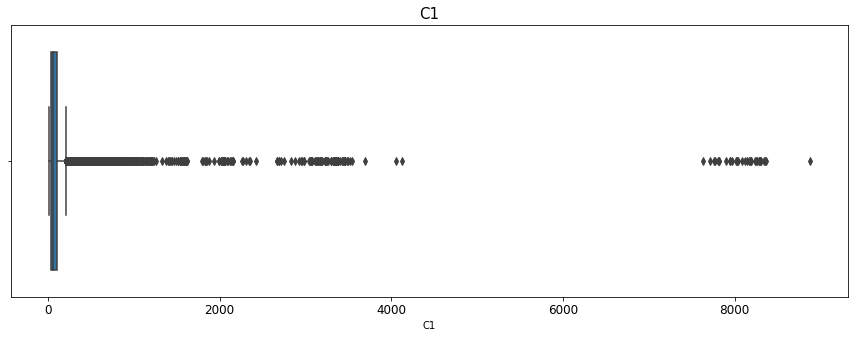

In [ ]:
#Verificação dos outliers, através de um boxplot: 
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C1'], orient = 'v')

ax.set_title('C1', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

In [ ]:
visitantes_bv_clean.sort_values(by=['C1'], ascending=True)

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
601393,2247,10.000000,0.00,0.000000,0.00,10.000000,15.500000,0.0,0.0,10.000000,...,0.0,NaN,0.0,2.57,7.0,11,13,9,45,2021-11-13
125816,2248,10.000000,0.00,6.730000,0.00,3.280000,7.160000,0.0,0.0,6.730000,...,0.0,NaN,0.0,5.00,10.0,1,21,11,0,2022-01-21
10586,2247,10.000000,0.00,10.000000,0.00,0.000000,0.000000,0.0,0.0,3.890000,...,0.0,NaN,0.0,3.21,15.0,1,14,10,10,2022-01-14
23732,1990,10.000000,0.00,10.000000,0.00,0.000000,21.530001,0.0,0.0,10.000000,...,0.0,NaN,7.0,7.00,7.0,12,11,4,25,2021-12-11
225059,2117,10.000000,3.36,10.000000,3.36,0.000000,17.100000,0.0,0.0,10.000000,...,0.0,NaN,0.0,2.67,4.0,12,17,5,25,2021-12-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239581,2052,8306.019531,0.00,8291.719727,0.00,31.790001,76.269997,0.0,2.5,8306.019531,...,0.0,android:Total Traffic,0.0,7.81,21.0,12,28,5,20,2021-12-28
62437,1987,8337.570312,3.24,8337.570312,3.24,8305.419922,14.340000,0.0,0.0,8337.570312,...,0.0,android:Total Traffic,0.0,3.20,26.0,12,28,6,5,2021-12-28
239568,2052,8351.709961,0.00,8340.200195,0.00,11.500000,62.470001,0.0,0.0,8351.709961,...,0.0,android:Total Traffic,0.0,8.45,21.0,12,28,5,35,2021-12-28
239554,2052,8370.799805,0.00,8370.799805,0.00,19.959999,83.440002,0.0,0.0,8370.799805,...,0.0,NaN,0.0,10.06,71.0,12,28,5,50,2021-12-28


In [ ]:
visitantes_bv_clean.sort_values(by=['C1'], ascending=False)

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
534070,2054,8873.519531,0.00,8840.589844,0.00,8795.299805,63.750000,0.0,0.00,8873.519531,...,0.00,android:Total Traffic,0.0,7.13,21.0,11,2,17,5,2021-11-02
239554,2052,8370.799805,0.00,8370.799805,0.00,19.959999,83.440002,0.0,0.00,8370.799805,...,0.00,NaN,0.0,10.06,71.0,12,28,5,50,2021-12-28
239568,2052,8351.709961,0.00,8340.200195,0.00,11.500000,62.470001,0.0,0.00,8351.709961,...,0.00,android:Total Traffic,0.0,8.45,21.0,12,28,5,35,2021-12-28
62437,1987,8337.570312,3.24,8337.570312,3.24,8305.419922,14.340000,0.0,0.00,8337.570312,...,0.00,android:Total Traffic,0.0,3.20,26.0,12,28,6,5,2021-12-28
239581,2052,8306.019531,0.00,8291.719727,0.00,31.790001,76.269997,0.0,2.50,8306.019531,...,0.00,android:Total Traffic,0.0,7.81,21.0,12,28,5,20,2021-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179230,2182,10.000000,0.00,10.000000,0.00,0.000000,0.000000,0.0,0.00,10.000000,...,0.00,android:Total Traffic,0.0,3.75,5.0,1,4,13,5,2022-01-04
73444,1989,10.000000,0.00,10.000000,0.00,0.000000,0.370000,0.0,0.00,10.000000,...,0.00,NaN,10.0,10.00,10.0,1,2,6,15,2022-01-02
159797,2441,10.000000,0.00,10.000000,0.00,6.180000,2.520000,0.0,2.52,10.000000,...,6.18,NaN,0.0,6.57,20.0,12,18,10,55,2021-12-18
316266,2118,10.000000,0.00,10.000000,0.00,0.000000,10.120000,0.0,0.00,10.000000,...,0.00,NaN,7.0,7.00,7.0,12,9,2,50,2021-12-09


+ 6000

In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['C1'] >= 6000)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
50303,1987,8021.859863,3.12,8021.859863,3.12,0.000000,4.840000,0.0,0.00,8021.859863,...,0.0,android:Total Traffic,0.0,5.70,21.0,12,28,6,55,2021-12-28
50306,1987,7947.890137,3.09,7947.890137,3.09,16.730000,4.820000,0.0,0.00,7947.890137,...,0.0,android:Total Traffic,0.0,3.86,17.0,12,28,7,0,2021-12-28
52019,1986,7813.560059,0.00,119.959999,0.00,7708.049805,6929.500000,0.0,0.00,7799.490234,...,0.0,NaN,0.0,3.29,16.0,12,28,7,30,2021-12-28
62437,1987,8337.570312,3.24,8337.570312,3.24,8305.419922,14.340000,0.0,0.00,8337.570312,...,0.0,android:Total Traffic,0.0,3.20,26.0,12,28,6,5,2021-12-28
63516,1986,7808.490234,0.00,64.309998,0.00,43.040001,5941.189941,0.0,0.00,7808.490234,...,0.0,NaN,0.0,3.93,16.0,12,28,3,40,2021-12-28
67775,1987,8139.859863,3.16,57.520000,3.16,14.500000,7087.970215,0.0,0.00,8139.859863,...,0.0,android:Total Traffic,0.0,3.38,10.0,12,28,7,5,2021-12-28
67777,1987,8121.660156,3.14,8096.319824,3.14,35.060001,26.610001,0.0,0.00,8121.660156,...,0.0,android:Total Traffic,0.0,5.54,46.0,12,28,6,45,2021-12-28
85940,1987,8184.399902,3.17,8162.779785,3.17,11.820000,23.500000,0.0,0.00,8184.399902,...,0.0,android:Total Traffic,0.0,5.52,42.0,12,28,6,50,2021-12-28
86188,1988,7818.549805,0.00,7818.549805,0.00,7809.919922,7.040000,0.0,0.00,7818.549805,...,0.0,NaN,0.0,1.68,10.0,12,28,7,25,2021-12-28
86290,1987,8244.500000,3.19,8222.330078,3.19,8211.450195,23.290001,0.0,0.00,8244.500000,...,0.0,android:Total Traffic,0.0,3.18,10.0,12,28,6,25,2021-12-28


In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['C1'] >= 6000)&(visitantes_bv_clean['Day'] == 28)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
50303,1987,8021.859863,3.12,8021.859863,3.12,0.000000,4.840000,0.0,0.00,8021.859863,...,0.0,android:Total Traffic,0.0,5.70,21.0,12,28,6,55,2021-12-28
50306,1987,7947.890137,3.09,7947.890137,3.09,16.730000,4.820000,0.0,0.00,7947.890137,...,0.0,android:Total Traffic,0.0,3.86,17.0,12,28,7,0,2021-12-28
52019,1986,7813.560059,0.00,119.959999,0.00,7708.049805,6929.500000,0.0,0.00,7799.490234,...,0.0,NaN,0.0,3.29,16.0,12,28,7,30,2021-12-28
62437,1987,8337.570312,3.24,8337.570312,3.24,8305.419922,14.340000,0.0,0.00,8337.570312,...,0.0,android:Total Traffic,0.0,3.20,26.0,12,28,6,5,2021-12-28
63516,1986,7808.490234,0.00,64.309998,0.00,43.040001,5941.189941,0.0,0.00,7808.490234,...,0.0,NaN,0.0,3.93,16.0,12,28,3,40,2021-12-28
67775,1987,8139.859863,3.16,57.520000,3.16,14.500000,7087.970215,0.0,0.00,8139.859863,...,0.0,android:Total Traffic,0.0,3.38,10.0,12,28,7,5,2021-12-28
67777,1987,8121.660156,3.14,8096.319824,3.14,35.060001,26.610001,0.0,0.00,8121.660156,...,0.0,android:Total Traffic,0.0,5.54,46.0,12,28,6,45,2021-12-28
85940,1987,8184.399902,3.17,8162.779785,3.17,11.820000,23.500000,0.0,0.00,8184.399902,...,0.0,android:Total Traffic,0.0,5.52,42.0,12,28,6,50,2021-12-28
86188,1988,7818.549805,0.00,7818.549805,0.00,7809.919922,7.040000,0.0,0.00,7818.549805,...,0.0,NaN,0.0,1.68,10.0,12,28,7,25,2021-12-28
86290,1987,8244.500000,3.19,8222.330078,3.19,8211.450195,23.290001,0.0,0.00,8244.500000,...,0.0,android:Total Traffic,0.0,3.18,10.0,12,28,6,25,2021-12-28


In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['Day'] == 28)&(visitantes_bv_clean['Hour'] == 3)&(visitantes_bv_clean['Minute'] == 45)&(visitantes_bv_clean['Grid_ID'] == 1986)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
105080,1986,35.049999,0.00,35.049999,0.00,3.880000,39.189999,0.0,0.0,35.049999,...,0.0,NaN,0.0,4.15,31.0,12,28,3,45,2021-12-28
401148,1986,54.270000,5.47,54.270000,5.47,0.000000,23.740000,0.0,0.0,54.270000,...,0.0,NaN,0.0,4.71,12.0,11,28,3,45,2021-11-28
711631,1986,126.349998,2.29,99.959999,2.29,38.360001,65.440002,0.0,0.0,126.349998,...,0.0,android:Total Traffic,0.0,6.19,56.0,10,28,3,45,2021-10-28


In [ ]:
visitantes_bv_clean = visitantes_bv_clean.drop(visitantes_bv_clean[(visitantes_bv_clean['C1'] >= 6000)].index)

In [ ]:
visitantes_bv_clean.shape

(628424, 23)

+ 4000

In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['C1'] >= 4000) & (visitantes_bv_clean['C1'] < 6000)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
37652,1989,4124.560059,2.2,4122.359863,0.0,4121.180176,1.880000,2.2,1.88,4124.560059,...,0.0,NaN,0.0,3.68,20.0,1,22,16,45,2022-01-22
63513,1986,4054.010010,0.0,4043.379883,0.0,3980.149902,3004.100098,0.0,0.00,4054.010010,...,0.0,NaN,0.0,4.02,27.0,12,28,3,35,2021-12-28


In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1989) & (visitantes_bv_clean['Hour'] == 16) & (visitantes_bv_clean['Day'] == 22)& (visitantes_bv_clean['Month'] == 1)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
35297,1989,31.209999,0.00,25.750000,0.00,5.460000,4.670000,0.00,0.00,31.209999,...,0.0,NaN,0.0,7.33,26.0,1,22,16,0,2022-01-22
37652,1989,4124.560059,2.20,4122.359863,0.00,4121.180176,1.880000,2.20,1.88,4124.560059,...,0.0,NaN,0.0,3.68,20.0,1,22,16,45,2022-01-22
81439,1989,52.610001,0.00,13.480000,0.00,46.430000,3591.530029,0.00,0.00,52.610001,...,0.0,NaN,0.0,2.86,12.0,1,22,16,50,2022-01-22
128777,1989,34.639999,0.00,16.000000,0.00,0.000000,15.850000,0.00,0.00,34.639999,...,0.0,NaN,0.0,4.73,26.0,1,22,16,35,2022-01-22
128799,1989,36.299999,2.24,30.760000,0.00,4.980000,4.710000,0.00,1.91,36.299999,...,0.0,NaN,0.0,4.31,26.0,1,22,16,20,2022-01-22
128856,1989,25.920000,0.00,25.920000,0.00,0.000000,6.890000,0.00,0.00,25.920000,...,0.0,NaN,10.0,18.00,26.0,1,22,16,10,2022-01-22
173138,1989,17.900000,0.00,17.900000,0.00,8.050000,0.000000,0.00,0.00,17.900000,...,0.0,NaN,0.0,8.67,16.0,1,22,16,5,2022-01-22
173164,1989,43.639999,0.00,33.740002,0.00,28.059999,8.470000,0.00,0.00,43.639999,...,0.0,NaN,0.0,4.09,26.0,1,22,16,30,2022-01-22
216607,1989,35.040001,2.21,30.920000,2.21,9.580000,6.290000,2.21,0.00,35.040001,...,0.0,NaN,0.0,4.18,26.0,1,22,16,15,2022-01-22
220604,1989,20.450001,0.00,13.390000,0.00,7.060000,14.570000,0.00,0.00,20.450001,...,0.0,NaN,0.0,1.83,9.0,1,22,16,55,2022-01-22


In [ ]:
visitantes_bv_clean = visitantes_bv_clean.drop(visitantes_bv_clean[(visitantes_bv_clean['C1'] >= 4000)].index)

* C2-roaming	

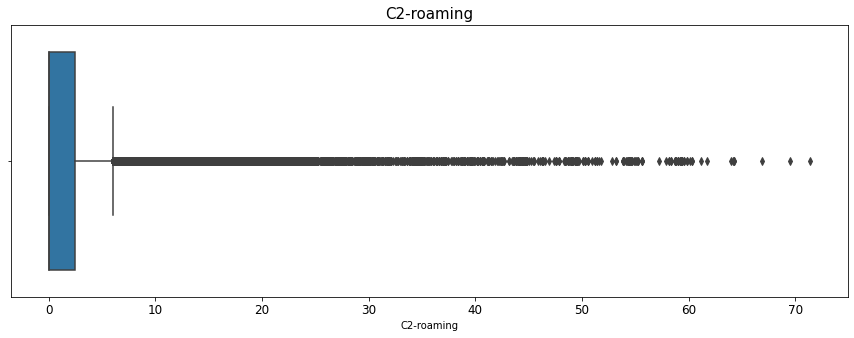

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C2-roaming'], orient = 'v')

ax.set_title('C2-roaming', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* C3 (permanecem)

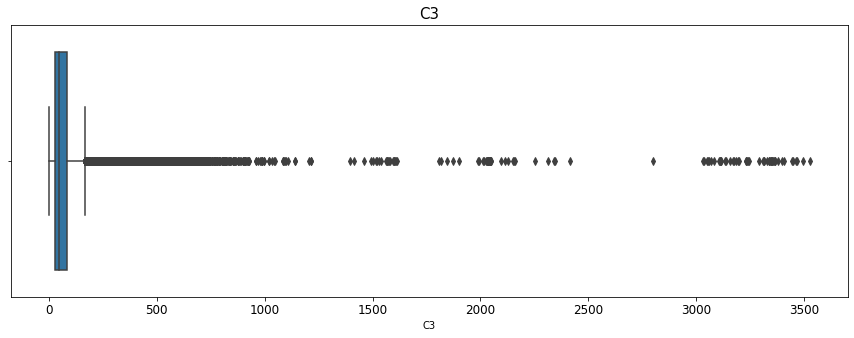

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C3'], orient = 'v')

ax.set_title('C3', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* C4-roaming

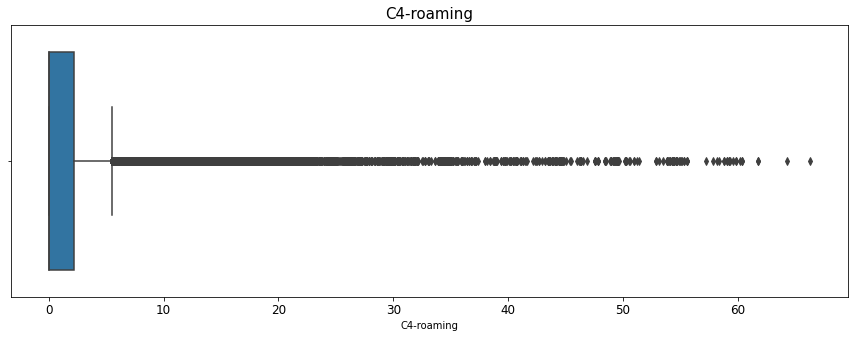

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C4-roaming'], orient = 'v')

ax.set_title('C4-roaming', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* entradas

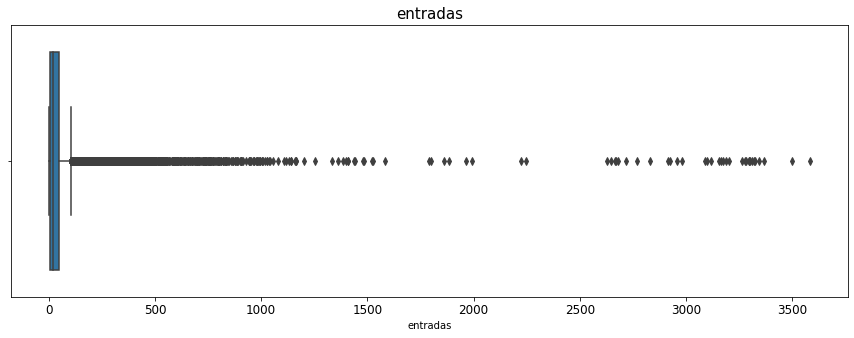

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['entradas'], orient = 'v')

ax.set_title('entradas', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

In [ ]:
visitantes_bv_clean.sort_values(by=['entradas'], ascending=False)

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
378017,1864,3691.060059,2.80,223.070007,0.00,3581.350098,3045.110107,2.8,2.43,3684.290039,...,0.000000,android:Total Traffic,0.0,5.38,181.0,11,17,8,5,2021-11-17
39777,2119,3537.610107,2.53,3525.209961,2.53,3496.979980,63.310001,0.0,0.00,3537.610107,...,0.000000,NaN,0.0,8.00,58.0,1,20,21,5,2022-01-20
711829,1865,3487.750000,2.77,135.619995,2.77,3366.520020,3095.870117,0.0,2.53,3487.750000,...,3298.179932,NaN,0.0,3.67,31.0,10,29,8,5,2021-10-29
95082,1987,3352.739990,0.00,3352.739990,0.00,3345.070068,3.250000,0.0,0.00,3352.739990,...,0.000000,NaN,0.0,3.40,15.0,12,27,23,40,2021-12-27
217361,2052,3448.800049,2.60,3445.439941,2.60,3326.439941,2632.139893,0.0,0.00,3448.800049,...,0.000000,android:Total Traffic,0.0,8.36,45.0,12,28,0,30,2021-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416816,1865,94.070000,0.00,94.070000,0.00,0.000000,16.290001,0.0,0.00,72.190002,...,0.000000,NaN,0.0,1.25,3.0,11,30,0,30,2021-11-30
112927,2248,13.280000,0.00,13.280000,0.00,0.000000,0.000000,0.0,0.00,13.280000,...,0.000000,NaN,10.0,29.50,49.0,1,8,3,55,2022-01-08
112924,1928,29.000000,0.00,29.000000,0.00,0.000000,0.000000,0.0,0.00,29.000000,...,0.000000,NaN,8.0,8.00,8.0,1,8,3,55,2022-01-08
112921,2115,84.029999,0.00,84.029999,0.00,0.000000,26.240000,0.0,0.00,84.029999,...,0.000000,NaN,0.0,6.59,36.0,1,8,4,10,2022-01-08


In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['entradas'] >= 6000)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date


* saidas

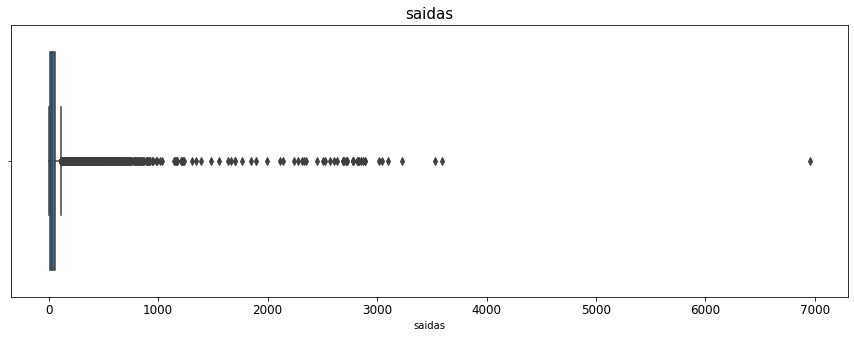

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['saidas'], orient = 'v')

ax.set_title('saidas', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['saidas'] >= 6000)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
344346,2051,80.650002,2.99,68.349998,0.0,34.369999,6951.649902,0.0,2.71,80.650002,...,0.0,NaN,0.0,5.2,20.0,12,28,7,40,2021-12-28


In [ ]:
visitantes_bv_clean = visitantes_bv_clean.drop(visitantes_bv_clean[(visitantes_bv_clean['saidas'] >= 6000)].index)

* entradas-roaming 

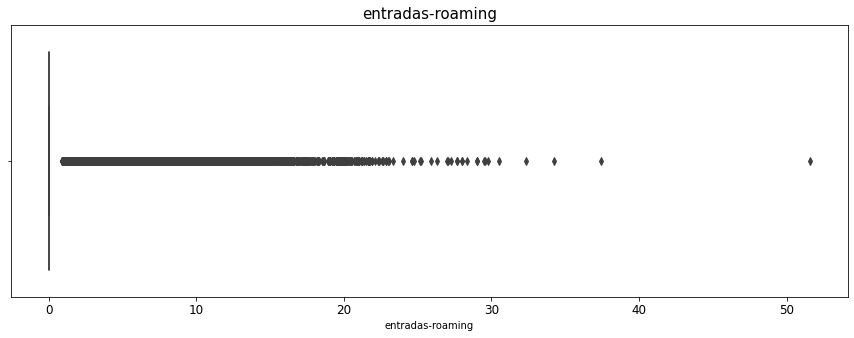

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['entradas-roaming'], orient = 'v')

ax.set_title('entradas-roaming', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* saidas-roaming

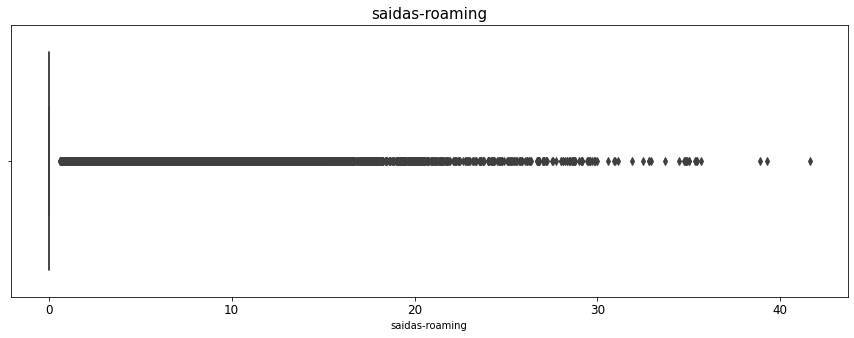

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['saidas-roaming'], orient = 'v')

ax.set_title('saidas-roaming', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* E1 (chamadas de voz que terminaram na quadricula)

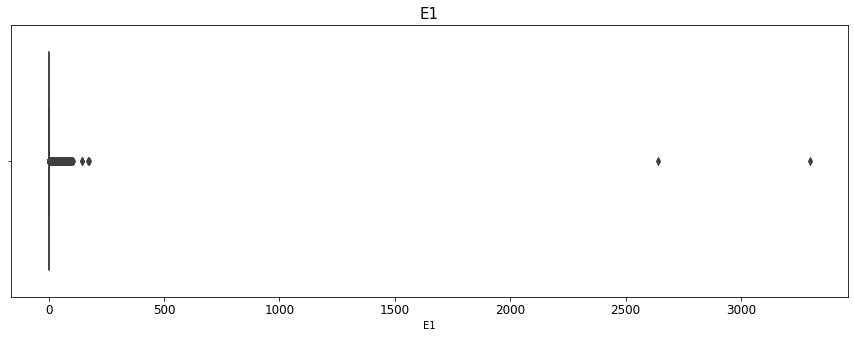

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['E1'], orient = 'v')

ax.set_title('E1', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

In [ ]:
visitantes_bv_clean[(visitantes_bv_clean['E1'] >= 2000)]

,Grid_ID,C1,C2-roaming,C3,C4-roaming,entradas,saidas,entradas-roaming,saidas-roaming,C9,...,E1,apps,E7,E8,E9,Month,Day,Hour,Minute,Date
258682,2246,2670.389893,4.87,24.290001,4.87,2648.530029,2277.679932,2.44,0.00,2670.389893,...,2640.770020,NaN,0.0,6.03,23.0,12,26,19,20,2021-12-26
711829,1865,3487.750000,2.77,135.619995,2.77,3366.520020,3095.870117,0.00,2.53,3487.750000,...,3298.179932,NaN,0.0,3.67,31.0,10,29,8,5,2021-10-29


* C9 (dados ativos)

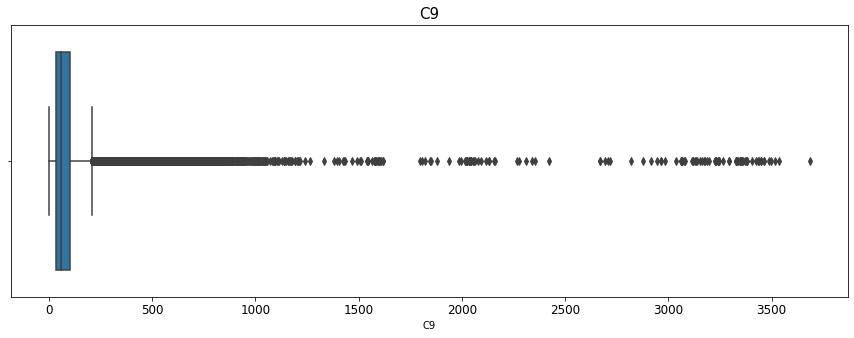

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C9'], orient = 'v')

ax.set_title('C9', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* C10 roaming

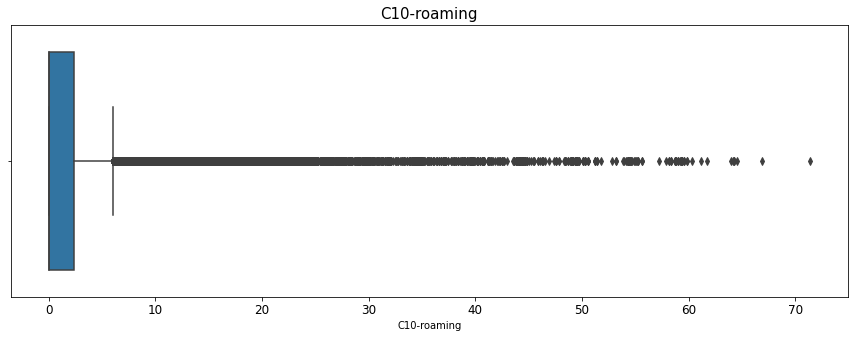

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C10-roaming'], orient = 'v')

ax.set_title('C10-roaming', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* C11 (chamadas de voz com origem na quadricula)

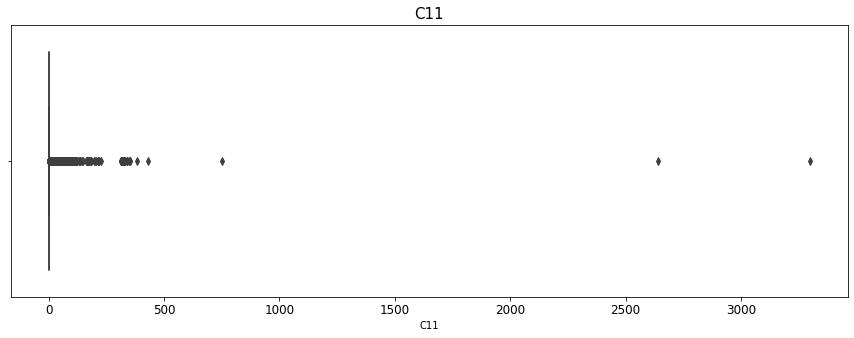

In [ ]:
#Verificação dos outliers, através de um boxplot:
fig, ax = plt.subplots(figsize=(15, 5))

sns.boxplot(visitantes_bv_clean['C11'], orient = 'v')

ax.set_title('C11', fontsize = 15, loc='center')
plt.tick_params(axis='x', which='major', labelsize=12)
ax.yaxis.tick_left()

* Apagar percentagem de quadriculas

In [ ]:
q = [1864,1865,1866,1925,1926,1927,1928,1986,1987,1988,1990,2050,2051,2052,2053,2054,2115,2116,2118,2180,2183,
2184,2199,2248,2249,2441,2442,2246,2376,2377,2378,2313,2311]

In [ ]:
df = visitantes_bv_clean

* Grid 1864

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1864)].index)

In [ ]:
df.shape

(600250, 23)

In [ ]:
df_1864 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1864)]
a = df_1864.sample(frac=0.01, replace=True, random_state=1)
a.shape #211

(211, 23)

* Grid 1865

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1865)].index)

In [ ]:
df_1865 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1865)]
b = df_1865.sample(frac=0.125, replace=True, random_state=1)
b.shape #

(21075, 23)

* Grid 1866

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1866)].index)

In [ ]:
df_1866 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1866)]
c = df_1866.sample(frac=0.06, replace=True, random_state=1)
c.shape #

* Grid 1925

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1925)].index)

In [ ]:
df_1925 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1925)]
d = df_1925.sample(frac=0.1375, replace=True, random_state=1)
d.shape #

* Grid 1926

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1926)].index)

In [ ]:
df_1926 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1926)]
e = df_1926.sample(frac=0.75, replace=True, random_state=1)
e.shape #


* Grid 1927

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1927)].index)

In [ ]:
df_1927 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1927)]
f= df_1926.sample(frac=0.96, replace=True, random_state=1)
f.shape #

* Grid 1928

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1928)].index)

In [ ]:
df_1928 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1928)]
g= df_1928.sample(frac=0.28, replace=True, random_state=1)
g.shape #

* Grid 1986

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1986)].index)

In [ ]:
df_1986 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1986)]
h= df_1986.sample(frac=0.1275, replace=True, random_state=1)
h.shape #

* Grid 1987

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1987)].index)

In [ ]:
df_1987 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1987)]
i= df_1987.sample(frac=0.5, replace=True, random_state=1)
i.shape #

* Grid 1988

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1988)].index)

In [ ]:
df_1988 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1988)]
j = df_1988.sample(frac=0.97, replace=True, random_state=1)
j.shape #

* Grid 1990

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 1990)].index)

In [ ]:
df_1990 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 1990)]
k = df_1990.sample(frac=0.60, replace=True, random_state=1)
k.shape #

* Grid 2050

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2050)].index)

In [ ]:
df_2050 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2050)]
l = df_2050.sample(frac=0.9, replace=True, random_state=1)
l.shape #

* Grid 2051

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2051)].index)

In [ ]:
df_2051 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2051)]
m = df_2051.sample(frac=0.89, replace=True, random_state=1)
m.shape #

* Grid 2052

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2052)].index)

In [ ]:
df_2052 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2052)]
n = df_2052.sample(frac=0.85, replace=True, random_state=1)
n.shape #

* Grid 2053

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2053)].index)

In [ ]:
df_2053 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2053)]
o = df_2053.sample(frac=0.80, replace=True, random_state=1)
o.shape #

* Grid 2054

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2054)].index)

In [ ]:
df_2054 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2054)]
p = df_2054.sample(frac=0.51, replace=True, random_state=1)
p.shape #

* Grid 2115

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2115)].index)

In [ ]:
df_2115 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2115)]
q = df_2115.sample(frac=0.80, replace=True, random_state=1)
q.shape #

* Grid 2116

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2116)].index)

In [ ]:
df_2116 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2116)]
r = df_2116.sample(frac=0.87, replace=True, random_state=1)
r.shape #

* Grid 2118

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2118)].index)

In [ ]:
df_2118 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2118)]
s = df_2118.sample(frac=0.97, replace=True, random_state=1)
s.shape #

* Grid 2180

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2180)].index)

In [ ]:
df_2180 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2180)]
t = df_2180.sample(frac=0.28, replace=True, random_state=1)
t.shape #

* Grid 2183

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2183)].index)

In [ ]:
df_2183 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2183)]
u = df_2183.sample(frac=0.97, replace=True, random_state=1)
u.shape #

* Grid 2184

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2184)].index)

In [ ]:
df_2184 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2184)]
v = df_2184.sample(frac=0.25, replace=True, random_state=1)
v.shape #

* Grid 2199

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2199)].index)

In [ ]:
df_2199 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2199)]
w = df_2199.sample(frac=0.26, replace=True, random_state=1)
w.shape #

* Grid 2248

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2248)].index)

In [ ]:
df_2248 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2248)]
x = df_2248.sample(frac=0.99, replace=True, random_state=1)
x.shape #

* Grid 2249

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2249)].index)

In [ ]:
df_2249 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2249)]
y = df_2249.sample(frac=0.28, replace=True, random_state=1)
y.shape #

* Grid 2441

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2441)].index)

In [ ]:
df_2441 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2441)]
z = df_2441.sample(frac=0.01, replace=True, random_state=1)
z.shape #

* Grid 2442

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2442)].index)

In [ ]:
df_2442 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2442)]
ab = df_2442.sample(frac=0.125, replace=True, random_state=1)
ab.shape #

* Grid 2246

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2246)].index)

In [ ]:
df_2246 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2246)]
ac = df_2246.sample(frac=0.15, replace=True, random_state=1)
ac.shape #

* Grid 2376

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2376)].index)

In [ ]:
df_2376 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2376)]
ad = df_2376.sample(frac=0.50, replace=True, random_state=1)
ad.shape #

* Grid 2377

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2377)].index)

In [ ]:
df_2377 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2377)]
ae = df_2377.sample(frac=0.88, replace=True, random_state=1)
ae.shape #

* Grid 2378

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2378)].index)

In [ ]:
df_2378 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2378)]
af = df_2378.sample(frac=0.03, replace=True, random_state=1)
af.shape #

* Grid 2313

In [ ]:
df = df.drop(df[(df['Grid_ID'] == 2313)].index)

In [ ]:
df_2313 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2313)]
ag = df_2313.sample(frac=0.45, replace=True, random_state=1)
ag.shape #

In [ ]:
df_2311 = visitantes_bv_clean[(visitantes_bv_clean['Grid_ID'] == 2311)]
ah = df_2311.sample(frac=0.60, replace=True, random_state=1)
ah.shape #

**Juntar as partições no dataset**

In [ ]:
frames_Grid = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z.ab,ac,ad,ae,af,ag,ah]

In [ ]:
df = pd.concat(frames_Grid)

In [ ]:
df.shape